<a href="https://colab.research.google.com/github/tacla/Sistemas-Inteligentes/blob/main/Clustering/K_MEANS_exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-MEANS: EXERCÍCIO INTRODUTÓRIO

Suponha  que temos dados numéricos sobre temperatura e umidade coletados em vários dias de um mês (*sem classe de saída, se trata de um algoritmo de aprendizado não-supervisonado*)

O objetivo é agrupar os dias por similaridade. Como você faria este agrupamento?
* Quais critérios você utilizaria?
* Quantos grupos definiria?

Abaixo, vamos criar um função para plotar os pontos do dataset com cores que indicam a qual cluster pertencem.

In [ ]:
def plot_dados(centroides=[], cores_centroides=[], cores_pontos='black'):
  # centroides: sao pares de coordenadas [(temp,umid), ...]
  # cores_centroides: cores para cada um dos centroides ['red', 'orange', ...]
  # cores_pontos: cores de cada ponto para indicar a qual centroide está associados

  # Plot points
  plt.scatter(dados["temp"], dados["umid"], color=cores_pontos)

  # Plota o rótulo de cada ponto
  for i, label in enumerate(dados["dia"]):
     plt.text(dados["temp"][i], dados["umid"][i], label)

  # atribui cores por default aos centroides caso não seja passadas
  if centroides and not cores_centroides:
      n_centroides = len(centroides)
      cores_centroides = cm.tab10(np.linspace(0, 1, n_centroides))

  # Plota centroides
  for i, centroide in enumerate(centroides):
      plt.scatter(*centroide, color=cores_centroides[i])
      plt.text(centroide[0], centroide[1], f'C{i+1}')

  # Títulos dos eixos e do gráfico
  plt.xlabel('Temperatura')
  plt.ylabel('Umidade')
  plt.title('Temperatura x Umidade')

  plt.show()  # Show the plot

Em primeiro lugar, vamos definir e plotar estes pontos (temperatura, umidade).

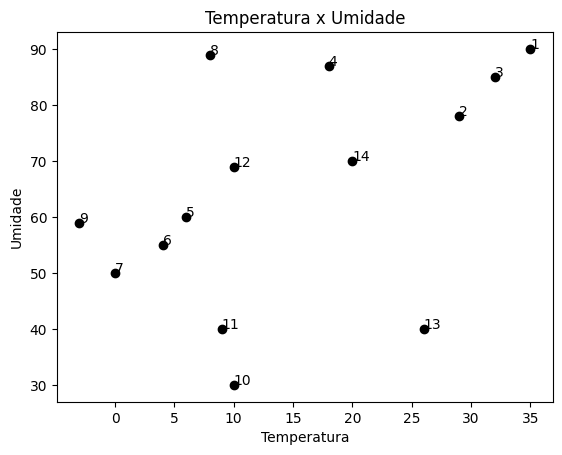

In [ ]:
import matplotlib.pyplot as plt

# Dados da tabela
dados = {'dia': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
         'temp': [35,29,32,18,6,4,0,8,-3,10,9,10,26,20],
         'umid': [90,78,85,87,60,55,50,89,59,30,40,69,40,70]}

plot_dados()

Um dos problemas do K-Means é determinar o número de clusters mais adequado. Vamos supor que 2 clusters são suficientes.

Então, criamos dois centroides aleatoriamente para cada um deles e plotamos novamente os pontos, agora com os dois centroides

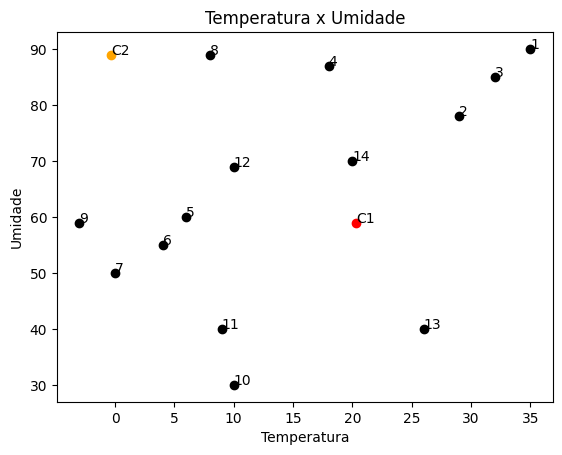

In [ ]:
import math
import random

# Faixa para temperatura e umidade
temp_min = min(dados["temp"])
temp_max = max(dados["temp"])
umid_min = min(dados["umid"])
umid_max = max(dados["umid"])

# Definicao do numero de centroides
k = 2
c=[(0, 0) for _ in range(k)] # inicializacao
cores_c = ['red', 'orange']


for i in range(k):
  c[i] = (random.uniform(temp_min, temp_max), random.uniform(umid_min, umid_max))

# Plot
plot_dados(c, cores_c)


Vamos calcular as distâncias de cada um dos pontos até os centroides c1 e c2. Em seguida, plotamos novamente os pontos com a cor do centroide do qual estão mais próximos.

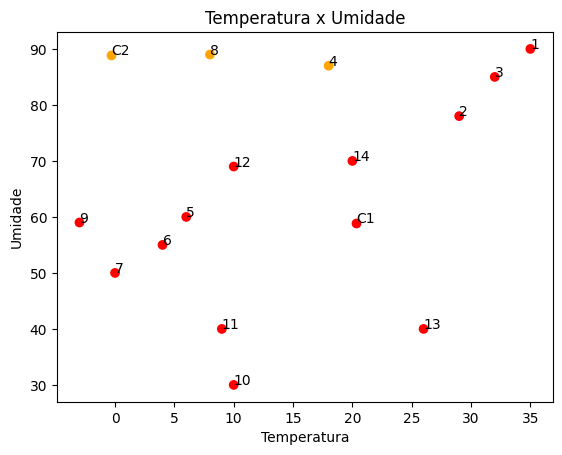

In [ ]:
# Cálculo da distância quadrática entre dois pontos quaisquer
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Calcula distância de cada ponto para c1 e para c2
distances_c1 = [calculate_distance(x, y, c[0][0], c[0][1]) for x, y in zip(dados["temp"], dados["umid"])]
distances_c2 = [calculate_distance(x, y, c[1][0], c[1][1]) for x, y in zip(dados["temp"], dados["umid"])]

# Associa cada ponto ao cluster mais próximo
cores_pontos = [cores_c[0] if d1 < d2 else cores_c[1] for d1, d2 in zip(distances_c1, distances_c2)]

plot_dados(c, cores_c, cores_pontos)


**EXERCÍCIO**:

Crie uma função para calcular o SSE de cada cluster (soma das distâncias quadráticas de cada ponto do cluster ao centroide).